Get the data on eruption times and waiting times between eruptions of the Old Faithful geyser from the website.
Estimate the mean waiting time and give a standard error estimate.
Also, give a 90 percent confidence interval for the mean waiting time.
Now estimate the median waiting time.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import norm

In [2]:
pd_data = pd.read_csv('./data/faithful.dat', delimiter='\s+')
data = pd_data['waiting'].to_numpy()

In [3]:
mean_est = np.mean(data)
print(f"An estimate for the mean waiting time is {mean_est:.0f} minutes.")

std_err_est = np.sqrt(np.var(data, ddof=0))
print(f"An estimate for the standard error in the mean waiting time is {std_err_est:.0f} minutes.")

alpha = 0.1
z = norm.isf(alpha/2)
error = z*std_err_est
print(f"With 90 percent confidence, the mean waiting time is {mean_est:.0f} ± {error:.0f} minutes.")

x=np.linspace(40, 100, 100)
empirical_cdf = np.array([np.mean(data <= xi) for xi in x])
median_est = x[np.searchsorted(empirical_cdf, 1/2, side='right')]
print(f"An estimate for the median is {median_est:.0f} minutes.")

An estimate for the mean waiting time is 71 minutes.
An estimate for the standard error in the mean waiting time is 14 minutes.
With 90 percent confidence, the mean waiting time is 71 ± 22 minutes.
An estimate for the median is 76 minutes.


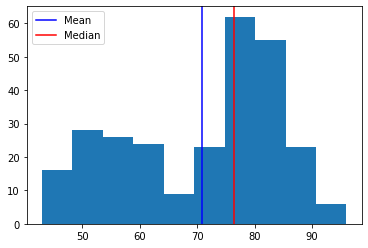

In [6]:
# Sanity check: plotting the data as a histogram
plt.hist(data)
plt.axvline(x=mean_est, color='b', label='Mean')
plt.axvline(x=median_est, color='r', label='Median')
plt.legend()
plt.show()